# Devoir d'évaluation - Régression linéaire

Intitulé :


In [1]:
import pandas as pd

In [2]:
url = "https://tinyurl.com/y4pflefj"

df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 27 columns):
time        8192 non-null object
lread       8192 non-null int64
lwrite      8192 non-null int64
scall       8192 non-null int64
sread       8192 non-null int64
swrite      8192 non-null int64
fork        8192 non-null float64
exec        8192 non-null float64
rchar       8192 non-null int64
wchar       8192 non-null int64
pgout       8192 non-null float64
ppgout      8192 non-null float64
pgfree      8192 non-null float64
pgscan      8192 non-null float64
atch        8192 non-null float64
pgin        8192 non-null float64
ppgin       8192 non-null float64
pflt        8192 non-null float64
vflt        8192 non-null float64
runqsz      8192 non-null float64
runocc      8192 non-null int64
freemem     8192 non-null int64
freeswap    8192 non-null int64
usr         8192 non-null int64
sys         8192 non-null int64
wio         7898 non-null float64
idle        7898 non-null float64


In [10]:
df.sample(10)

,time,lread,lwrite,scall,sread,swrite,fork,exec,rchar,wchar,...,pflt,vflt,runqsz,runocc,freemem,freeswap,usr,sys,wio,idle
7246,00:44:46,0,0,507,20,24,0.2,0.2,789,6978,...,15.60,16.80,1.0,100,7014,1861808,98,2,0.0,0.0
4324,14:11:31,4,2,3107,270,198,1.6,1.8,49962,60719,...,91.40,220.60,5.0,100,156,1020181,88,12,0.0,0.0
4305,11:27:32,5,2,2929,387,204,2.6,2.6,288065,215294,...,142.00,249.20,2.0,40,315,1130874,81,18,0.0,1.0
142,01:17:36,15,21,186,11,23,0.2,0.2,2058,12778,...,15.40,17.20,1.0,100,7138,1873512,96,4,0.0,0.0
4546,16:25:20,2,0,1200,134,128,0.6,0.6,208393,90332,...,29.94,131.54,126.0,954400,90,10,0,0,NaN,NaN
5618,22:54:59,5,0,1776,106,29,4.4,17.8,200983,13030,...,221.80,333.20,1.8,100,5306,1832483,88,12,0.0,0.0
7280,16:41:55,3,0,943,119,116,0.8,0.6,34217,32924,...,58.40,130.00,531.0,943466,93,7,0,0,NaN,NaN
752,17:06:12,4,2,2821,171,126,0.4,0.6,25208,41575,...,28.14,69.06,3.4,100,2859,1529525,94,6,0.0,0.0
8126,01:05:41,0,0,161,10,27,0.2,0.2,425,23258,...,15.60,16.80,1.0,100,6236,1856808,99,1,0.0,0.0
2918,15:07:54,7,1,2544,135,126,1.2,2.4,69693,23159,...,87.00,143.00,4.0,100,2892,1375262,91,9,0.0,0.0


In [6]:
import matplotlib.pyplot as plt

[(0, 1)]

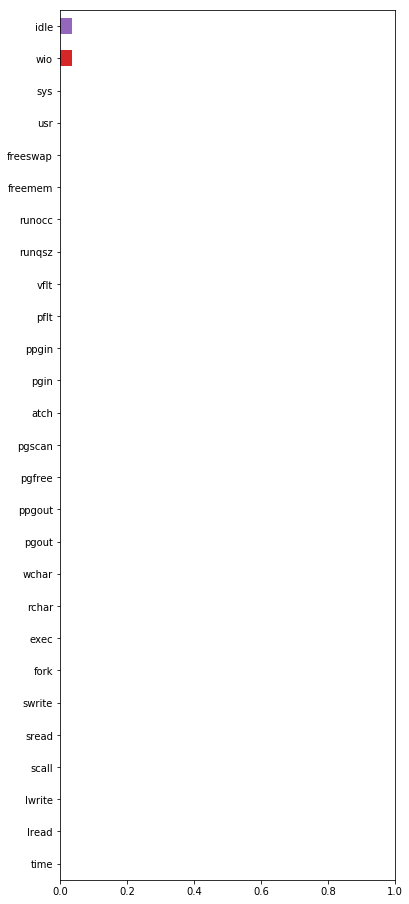

In [7]:
# On va faire une exploration des données pour voir quel pourcentage de valeurs vides par colonne
_, ax = plt.subplots(figsize=(6, 16))

df.isnull().mean().plot.barh(ax=ax)

ax.set(xlim=(0, 1))

In [8]:
df.isnull().sum().sum()

588

In [9]:
len(df)

8192

In [14]:
df['idle'].isnull().sum()

294

In [15]:
df['wio'].isnull().sum()

294

In [16]:
df.loc[:, ['idle', 'wio']] = df.loc[:, ['idle', 'wio']].fillna(0.0)

In [17]:
df.isnull().sum().sum()

0

In [18]:
import seaborn as sns

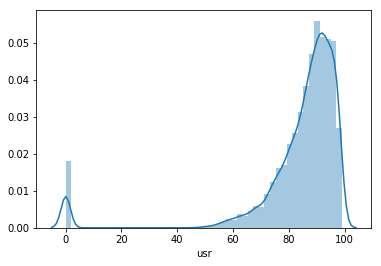

In [20]:
sns.distplot(df['usr'])

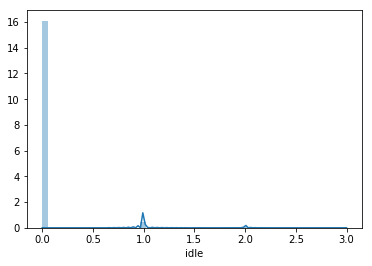

In [24]:
sns.distplot(df['idle'])

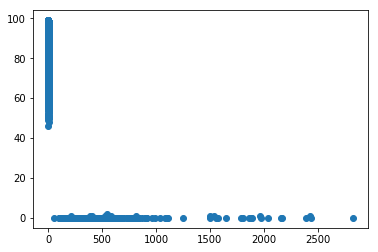

Comparaison entre lread et usr


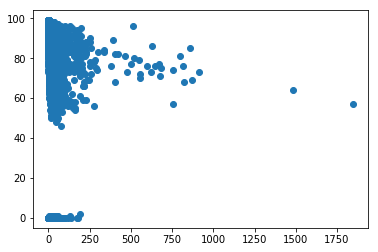

Comparaison entre lwrite et usr


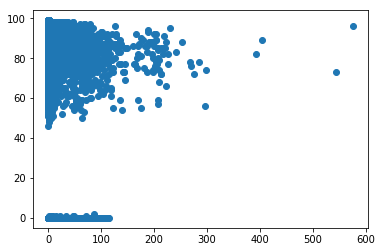

Comparaison entre scall et usr


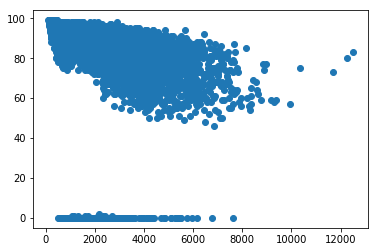

Comparaison entre sread et usr


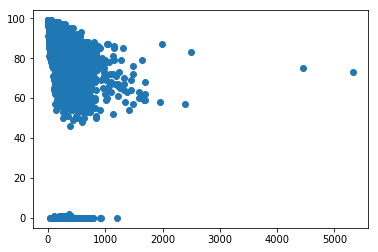

Comparaison entre swrite et usr


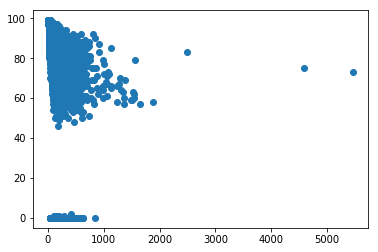

Comparaison entre fork et usr


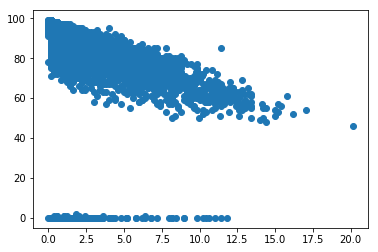

Comparaison entre exec et usr


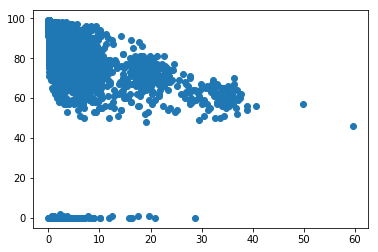

Comparaison entre rchar et usr


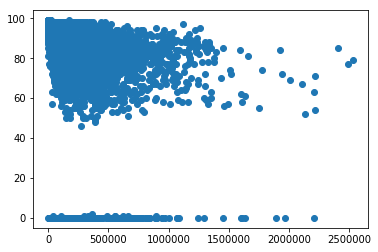

Comparaison entre wchar et usr


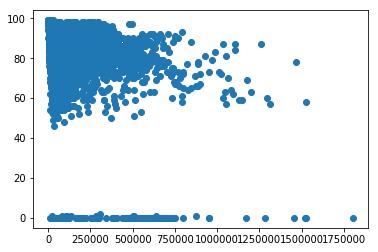

Comparaison entre pgout et usr


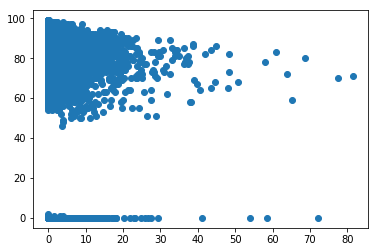

Comparaison entre ppgout et usr


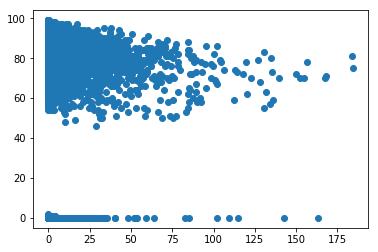

Comparaison entre pgfree et usr


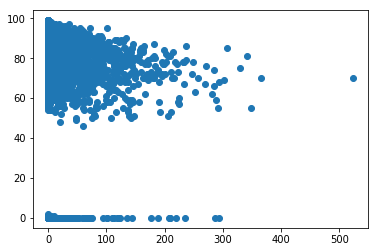

Comparaison entre pgscan et usr


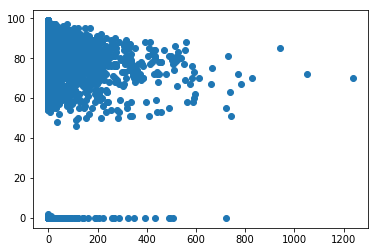

Comparaison entre atch et usr


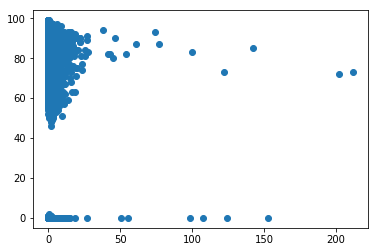

Comparaison entre pgin et usr


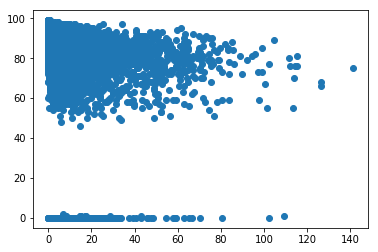

Comparaison entre ppgin et usr


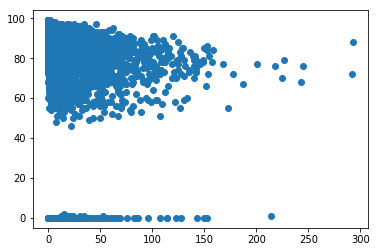

Comparaison entre pflt et usr


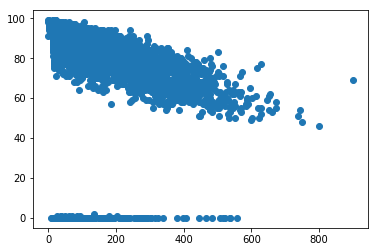

Comparaison entre vflt et usr


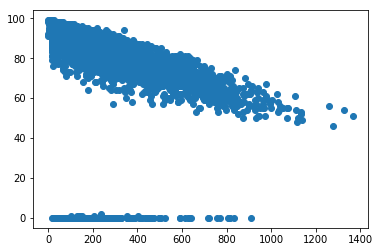

Comparaison entre runqsz et usr


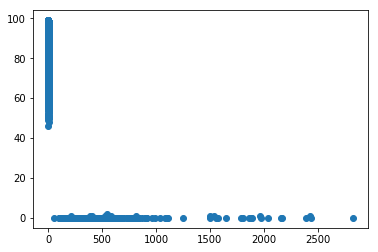

Comparaison entre runocc et usr


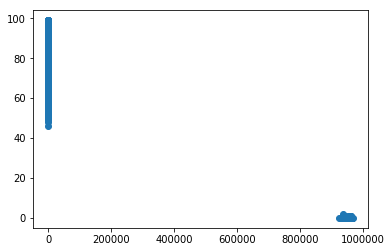

Comparaison entre freemem et usr


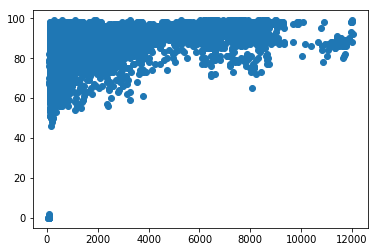

Comparaison entre freeswap et usr


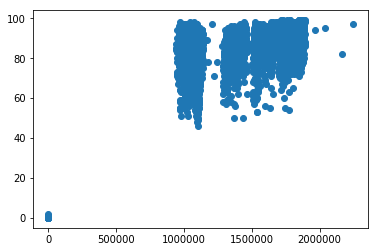

In [46]:
for col in df.columns:
    if col in ['usr', 'sys', 'wio', 'idle', 'time']:
        continue
    plt.scatter(df[col], df['usr'])
    print(f"Comparaison entre {col} et usr")
    plt.show()

In [56]:
# On importe la lib de régression linéaire de SciKit
from sklearn.linear_model import LinearRegression
# La segmentation du jeu de données en entrainement/test
from sklearn.model_selection import train_test_split
# Le calcul du r2_score
from sklearn.metrics import r2_score
# Le calcul du RMSLE
from sklearn.metrics import mean_squared_log_error
import numpy as np

In [57]:
def eval(col):
    X = df[[col]]
    y = df['usr']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    reg = LinearRegression()

    reg.fit(X_train, y_train)

    y_pred = reg.predict(X_test)
    
    print(f"Comparaison entre {col} et usr")
    
    r = r2_score(y_test, y_pred)
    print(f"R2_score {r}")
    
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    print(f"RMSLE_score {rmsle}")

    plt.scatter(X_test, y_test)
    plt.scatter(X_test, y_pred, color = 'red')
    plt.show()

Comparaison entre lread et usr
R2_score 0.022554441703411254
RMSLE_score 0.825929998369746


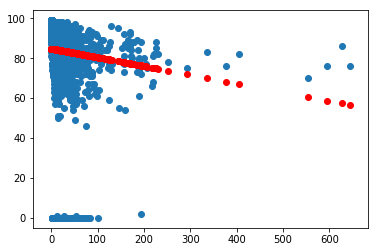

Comparaison entre lwrite et usr
R2_score 0.019000151009749056
RMSLE_score 0.807948786913678


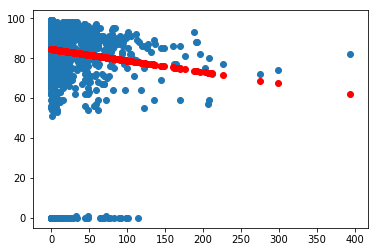

Comparaison entre scall et usr
R2_score 0.11816081536808232
RMSLE_score 0.8263620432274339


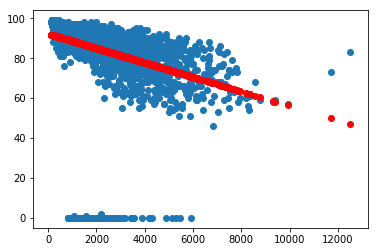

Comparaison entre sread et usr
R2_score 0.12121627773289545


ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [58]:
for col in df.columns:
    if col in ['usr', 'sys', 'wio', 'idle', 'time']:
        continue
    eval(col)